<a href="https://colab.research.google.com/github/savindumahasen/SpamClassificationProject/blob/main/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS spam classification using NLP

## Reading data and visualization

In [1]:
## import modules

In [2]:
import pandas as pd
import nltk

### Reading the dataset

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1':'class', 'v2':'sms'}, inplace=True)
df.sample(5)

,class,sms
2198,ham,I'm in a movie. Call me 4 wat?
3746,ham,ÌÏ neva tell me how i noe... I'm not at home i...
5162,ham,Just send a text. We'll skype later.
2253,ham,Lol enjoy role playing much?
4067,spam,TBS/PERSOLVO. been chasing us since Sept forå£...


In [8]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [9]:
df = df.drop_duplicates(keep='first')
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516                         Rofl. Its true to its name    1
spam    653    653  This is the 2nd time we have tried 2 contact u...    1

## Data Visualization

In [10]:
df['Length'] = df['sms'].apply(len)
df.head(5)

<ipython-input-10-6d81e3282597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length'] = df['sms'].apply(len)


,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

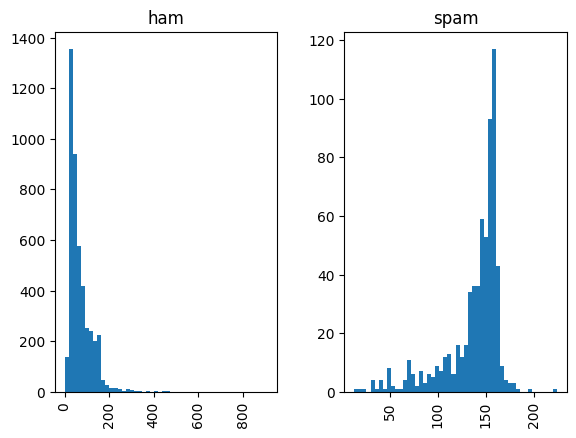

In [11]:
df.hist(column='Length', by='class', bins=50)

## Data Preprocessing

In [12]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
df.head()

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Preprocessing tasks
      #### Lower Case
      #### Tokernization
      #### Removing special character
      #### Removing the punctutations, and stop words
      #### Stemming

In [14]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stop words
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stop_words and i not in string.punctuation]

    # Apply stemming
    y = [ps.stem(i) for i in y]

    # Join the tokens back into a single string
    return " ".join(y)

# Assuming df is your DataFrame and 'sms' is the column to be cleaned
df['sms_cleaned'] = df['sms'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


## Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec= TfidfVectorizer(max_features=3000)
X= tf_vec.fit_transform(df['sms_cleaned']).toarray()
y=tf_vec.fit_transform(df['class']).toarray()
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [17]:
X.shape

(5169, 3000)

In [18]:
Y = df['class'].copy()

In [19]:
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

## Learning / Training the model

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=42)


In [21]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.naive_bayes import MultinomialNB

model= MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import accuracy_score


y_pred= model.predict(X_test)
accuracy_score(y_test,y_pred)

0.971953578336557

In [24]:
if y_pred[0]==0:
    print('ham')
else:
    print('spam')

spam


In [25]:
import pickle

# Save the model and the vectorizer to disk
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tf_vec, vectorizer_file)

In [26]:
%%writefile streamlit_app.py
import streamlit as st
import pickle

# Load the model and vectorizer
with open('spam_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tf_vec = pickle.load(vectorizer_file)

def predict_message(message):
    # Transform the input message using the loaded vectorizer
    message_vec = tf_vec.transform([message]).toarray()
    # Predict the label using the loaded model
    prediction = model.predict(message_vec)
    # Return 'ham' or 'spam'
    return 'ham' if prediction[0] == 0 else 'spam'

# Streamlit UI
st.title("Spam Classifier")
st.write("Enter a message to classify it as 'ham' or 'spam'.")

message = st.text_area("Message")

if st.button("Classify"):
    if message:
        prediction = predict_message(message)
        st.write(f"The message is classified as: **{prediction}**")
    else:
        st.write("Please enter a message to classify.")


Writing streamlit_app.py


In [27]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [28]:
!pip install streamlit numpy pandas scikit-learn




In [ ]:
!streamlit run --server.port 8502 streamlit_app.py






  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://35.188.108.151:8502



In [ ]:
lsof -i :8501
